In [ ]:
import pd as pd

reducedPapers = pd.read_csv(
    "./processedData/processedData.csv",
    sep=',',
    names=["timePeriod", "index", "rawText"]
)

reducedPapers.head(100)

In [8]:
from bertopic import BERTopic

model = BERTopic(language="english",
                       calculate_probabilities=True,
                       top_n_words=4,
                       nr_topics=50,
                       min_topic_size=50,
                       n_gram_range=(1,2),
                       verbose=True)
topics, probs = model.fit_transform(reducedPapers['processedText'])

Batches:   0%|          | 0/916 [00:00<?, ?it/s]

2023-04-06 14:34:11,785 - BERTopic - Transformed documents to Embeddings
2023-04-06 14:34:43,469 - BERTopic - Reduced dimensionality
2023-04-06 14:34:52,042 - BERTopic - Clustered reduced embeddings
2023-04-06 14:34:58,214 - BERTopic - Reduced number of topics from 53 to 50


In [9]:
model.get_topic_freq()
model.get_topic_info()

,Topic,Count,Name
0,-1,15641,-1_would_house_could_upon
1,0,2375,0_ireland_catholic_church_protestant
2,1,1536,1_hon_hon hon_right hon_right
3,2,617,2_gentleman_learned gentleman_learned_gentlema...
4,3,479,3_bank_note_circulation_fund
5,4,469,4_friend_learned friend_learned_hon friend
6,5,439,5_pergami_royal highness_highness_royal
7,6,437,6_would_house_could_hon
8,7,433,7_saw_time_nothing_day
9,8,422,8_minister_majesty_prince_majesty minister


In [12]:
import numpy as np
import pandas as pd
from umap import UMAP

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Prepare data for plotting
embeddings = model._extract_embeddings(reducedPapers['processedText'] , method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit(embeddings)
df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
df["topic"] = topics

# Plot parameters
top_n = 10
fontsize = 12

# Slice data
to_plot = df.copy()
to_plot[df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

# Visualize topics
cmap = matplotlib.colors.ListedColormap(['#FF5722', # Red
                                        '#03A9F4', # Blue
                                        '#4CAF50', # Green
                                        '#80CBC4', # FFEB3B
                                        '#673AB7', # Purple
                                        '#795548', # Brown
                                        '#E91E63', # Pink
                                        '#212121', # Black
                                        '#00BCD4', # Light Blue
                                        '#CDDC39', # Yellow/Red
                                        '#AED581', # Light Green
                                        '#FFE082', # Light Orange
                                        '#BCAAA4', # Light Brown
                                        '#B39DDB', # Light Purple
                                        '#F48FB1', # Light Pink
                                        ])

# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("BERTopic_Example_Cluster_Plot.png")
plt.show()

KeyboardInterrupt: 

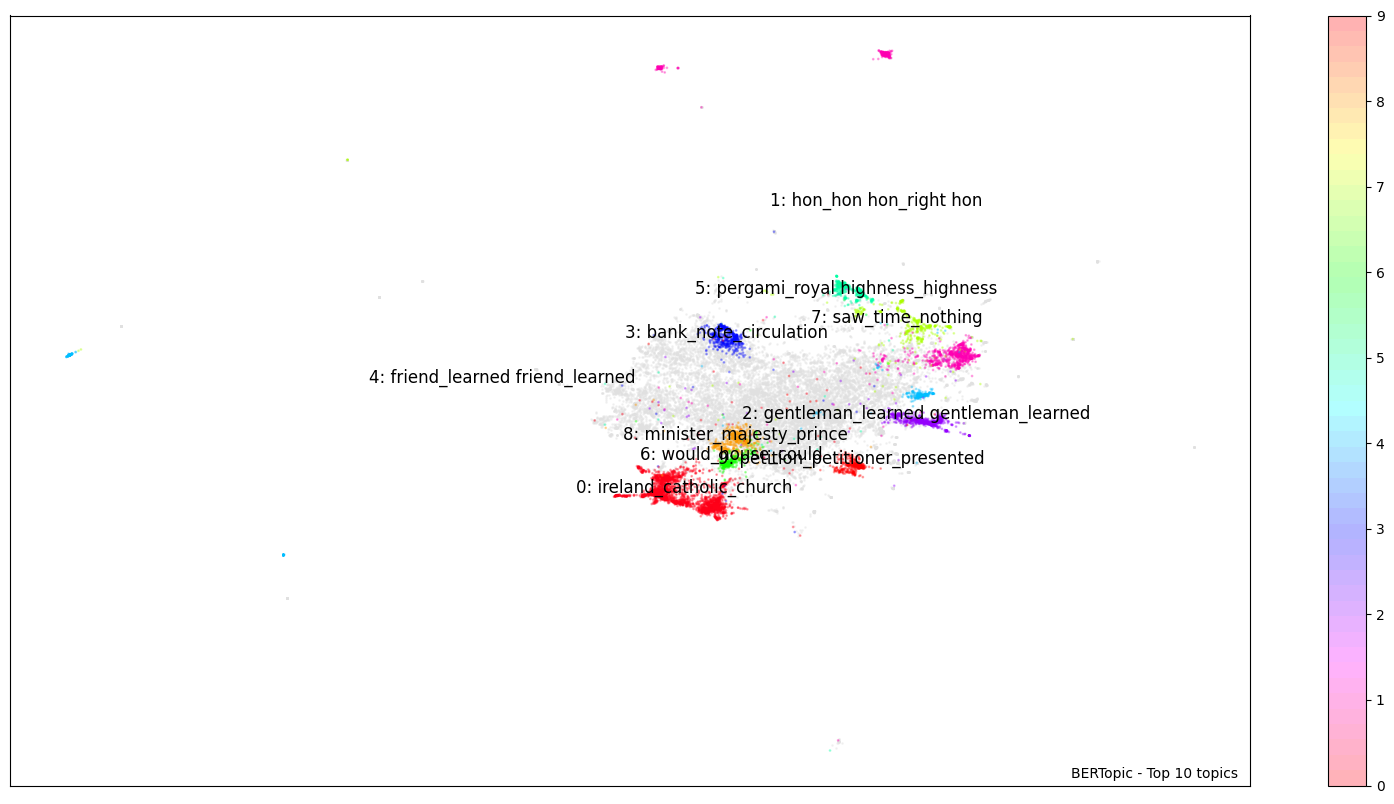

In [17]:
import numpy as np
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Prepare data for plotting
embeddings = model._extract_embeddings(reducedPapers['processedText'], method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit(embeddings)
df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
df["topic"] = topics

# Plot parameters
top_n = 10
fontsize = 12

# Slice data
to_plot = df.copy()
to_plot[df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

# Dynamic color scale
n_topics = len(np.unique(topics))
cmap = plt.get_cmap('hsv_r', n_topics)

# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(20, 10))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.colorbar(scatter)
plt.savefig("./diagramOutput/mergeCluster.png", dpi=600)
plt.show(dpi=600)


In [16]:
plt.savefig("./diagramOutput/mergeCluster.png", dpi=600)

<Figure size 640x480 with 0 Axes>